### Face Detection

#### Import Libraries 

In [72]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 as cv 

#### Import Images

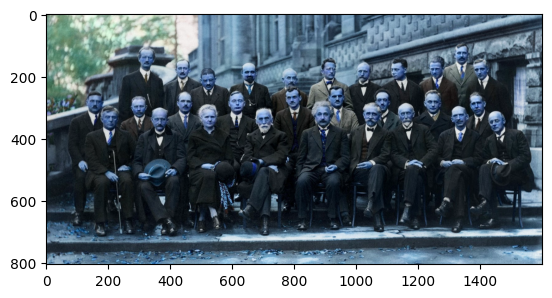

In [73]:
nadia = cv.imread('../data/Files/DATA/Nadia_Murad.jpg')
denis = cv.imread('../data/Files/DATA/Denis_Mukwege.jpg')
solvay_conference = cv.imread('../data/Files/DATA/solvay_conference.jpg')

# plt.imshow(nadia,cmap='gray')
# plt.imshow(denis,cmap='gray')
plt.imshow(solvay_conference,cmap='gray')

In [74]:
face_cascade = cv.CascadeClassifier('../data/Files/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [75]:
def detect_face(img):
  face_img = img.copy()
  face_rectangles = face_cascade.detectMultiScale(face_img)

  # render all the faces detected 
  for (x,y,w,h) in face_rectangles:
    cv.rectangle(img=face_img,pt1=(x,y),pt2=(x+w,y+h),color=(255,255,255),thickness=10)

  return face_img


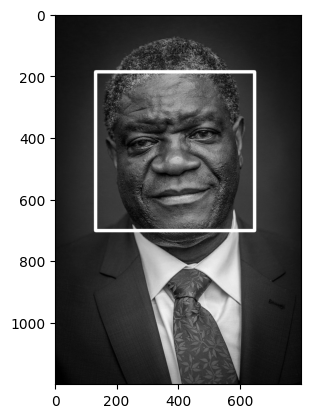

In [76]:
plt.imshow(detect_face(denis))

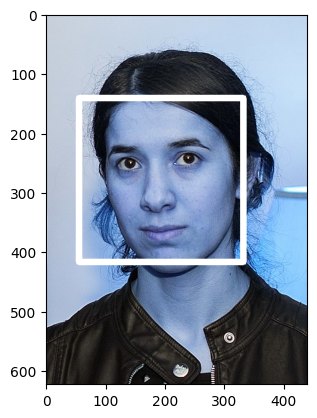

In [77]:
plt.imshow(detect_face(nadia))

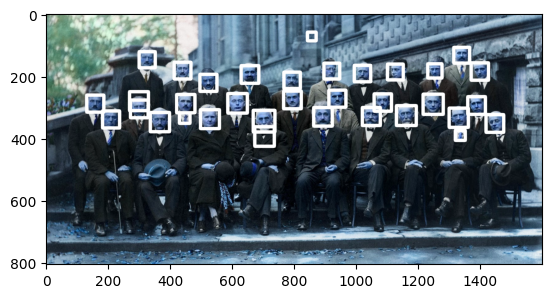

In [78]:
plt.imshow(detect_face(solvay_conference))

In [79]:
def modified_detect_face(img):
  face_img = img.copy()
  face_rectangles = face_cascade.detectMultiScale(image=face_img,scaleFactor=1.15,minNeighbors=5)

  # render all the faces detected
  for (x, y, w, h) in face_rectangles:
    cv.rectangle(img=face_img, pt1=(x, y), pt2=(
        x+w, y+h), color=(0, 255, 0), thickness=5)

  return face_img

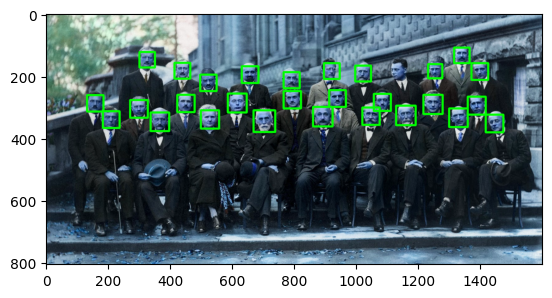

In [80]:
plt.imshow(modified_detect_face(solvay_conference))

- Detect Eyes 

In [81]:
eyes_cascade = cv.CascadeClassifier(
    '../data/Files/DATA/haarcascades/haarcascade_eye.xml')

def detect_eyes(eyes_img):
  img = eyes_img.copy()
  eyes_rectangles = eyes_cascade.detectMultiScale(image=img,scaleFactor=1.2,minNeighbors=5)

  # render all the eyess detected
  for (x, y, w, h) in eyes_rectangles:
    cv.rectangle(img=eyes_img, pt1=(x, y), pt2=(
        x+w, y+h), color=(255, 255, 255), thickness=10)

  return eyes_img

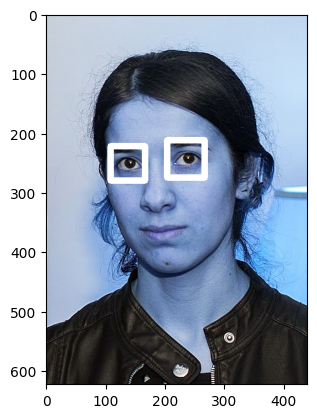

In [82]:
plt.imshow(detect_eyes(nadia))

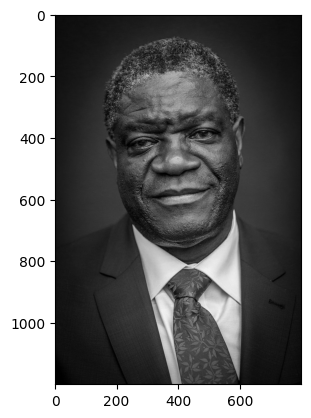

In [83]:
plt.imshow(detect_eyes(denis))

#### Live Feed Capturing

In [84]:
camera = cv.VideoCapture(0)

while True:
  ret,frame = camera.read(0)
  frame = modified_detect_face(frame)
  cv.imshow('Video Face Detector',frame)

  k = cv.waitKey(1)

  if k == 27:
    # esc key
    break

camera.release()
cv.destroyAllWindows()